# Customizing Plot Legends
includes:
+ change the format, tweak the parameters in ``plt.legend``
+ choose the element for legend
+ self defined legend
+ multiple legend

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

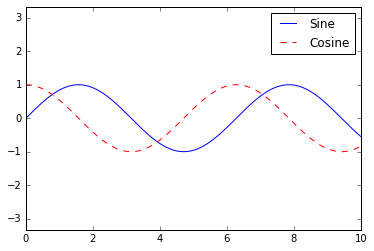

In [12]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

[explanation for ``ax.axis('equal')``](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/axis_equal_demo.html)

### Change format

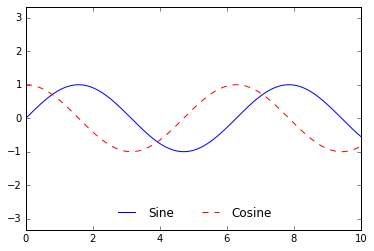

In [5]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

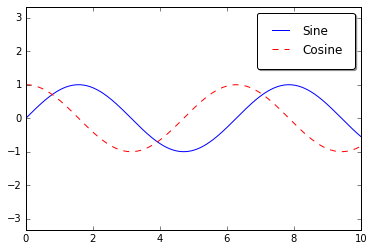

In [6]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

In [7]:
plt.legend?

### Choosing Elements for the Legend

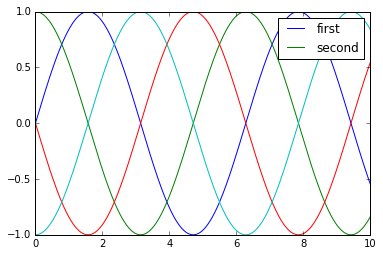

In [11]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y) # lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

you can also applying labels only to the plot elements you'd like to show on the legend. Notice that by default, the legend ignores all elements without a ``label`` attribute set.

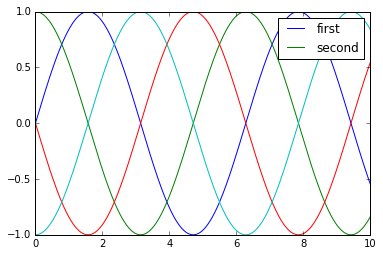

In [15]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1);

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

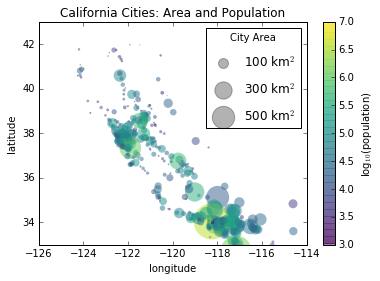

In [27]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')  # this is a empty plot since we use [] [], we only want to borrow its legend
plt.legend(scatterpoints=1, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

## Multiple Legends

Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard ``legend`` interface, it is only possible to create a single legend for the entire plot.
If you try to create a second legend using ``plt.legend()`` or ``ax.legend()``, it will simply override the first one.
We can work around this by creating a new legend artist from scratch, and then using the lower-level ``ax.add_artist()`` method to manually add the second artist to the plot:

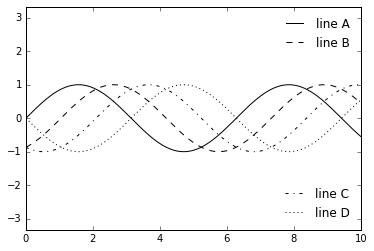

In [28]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 3),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

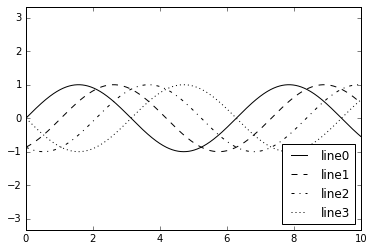

In [34]:
# note the following method doesn't work, the new legend will overwrite the previous one.
fig, ax = plt.subplots()
lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in [0, 1]:
    lines += ax.plot(x, np.sin(x - i * np.pi / 3),
                     styles[i], color='black', label = 'line'+'{0}'.format(i))
ax.axis('equal')
ax.legend(loc='upper right');

for i in [2, 3]:
    lines += ax.plot(x, np.sin(x - i * np.pi / 3),
                     styles[i], color='black', label = 'line'+'{0}'.format(i))
ax.axis('equal')
ax.legend(loc='lower right');

In [29]:
ax.legend??